In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset=pd.read_csv("datasets/housing.csv")
dataset=dataset.drop("ocean_proximity",axis=1)


In [3]:
dataset.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [4]:
dataset=dataset.dropna().copy()

In [5]:
def scalar(x):
    return (x-x.mean(axis=0))/x.std(axis=0)

In [6]:
dataset=scalar(dataset)

In [7]:
dataset.shape

(20433, 9)

In [8]:
target= dataset['median_house_value']
target=np.array(target)
target=target.reshape(target.shape[0],1)
features=dataset.drop('median_house_value',axis=1)
features=np.array(features)


In [9]:
weights0=np.random.rand(features.shape[1],1)
bias0=np.random.rand(1,1)

In [10]:
def linear_model(m,x,c):
    return np.matmul(x,m)+c

def error(m,x,c,y):
    return np.mean((linear_model(m,x,x)-y)**2)/100

def derivative_wrt_weights(m,x,c,y):
    derivatives=2*np.mean(np.multiply(x,linear_model(m,x,c)-y),axis=0)
    derivatives= np.array(derivatives)
    derivatives=derivatives.reshape(features.shape[1],1)
    return derivatives
     

def derivative_wrt_bias(m,x,c,y):
    derivative=2*np.mean(linear_model(m,x,c)-y)
    derivative= np.array(derivative)
    derivative=derivative.reshape(1,1)
    return derivative

def scalar(x):
    return (x-np.mean(x))/np.std(x)

def accuracy(m,x,c,y):
    currentError = error(m,features,c,target)
    maxError = np.mean(target**2)
    return (1-(currentError / maxError))*100

In [11]:
np.mean(np.multiply(features,linear_model(weights0,features,bias0)-target),axis=0)

array([ 0.44760247, -0.30901721, -0.39389877,  2.12118517,  2.14765786,
        2.21166221,  2.16696086, -0.02954254])

In [12]:
def model_result(alpha,num_of_iteration):
    weights=weights0
    bias=bias0
    error_cost=[]
    for i in range(num_of_iteration):
        weights = weights - alpha * derivative_wrt_weights(weights,features,bias,target)
        bias = bias - alpha * derivative_wrt_bias(weights,features,bias,target)
        error_cost.append(error(weights,features,bias,target))
    plt.plot(error_cost)
    print("Accuracy is: ",accuracy(weights,features,bias,target))
    print("Error is: ",error(weights,features,bias,target))

Accuracy is:  96.89540173269106
Error is:  0.031044463269052733


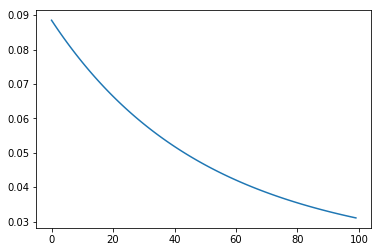

In [13]:
model_result(alpha=0.0015,num_of_iteration=100)

Accuracy is:  98.39352249636958
Error is:  0.016063988819153472


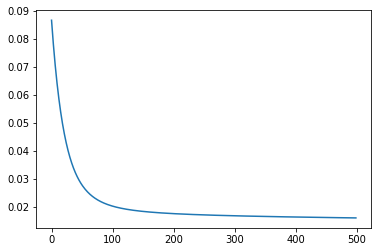

In [14]:
model_result(alpha=0.0035,num_of_iteration=500)